/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Précision sur les données d'entraînement: 0.99
Précision sur les données de test: 0.99


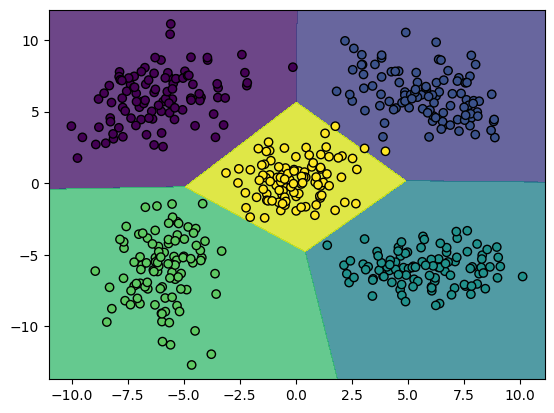

In [1]:
import numpy as np
from sklearn.svm import LinearSVC, SVR
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Charger les données
train_data1 = np.loadtxt("TP/data/data_tp1_app.txt", delimiter=' ')
test_data1 = np.loadtxt("TP/data/data_tp1_dec.txt", delimiter=' ')

# Séparer les features et les étiquettes
X_train, y_train = train_data1[:, -2:], train_data1[:, 0].astype(int)
X_test, y_test = test_data1[:, -2:], test_data1[:, 0].astype(int)

# Créer et entraîner le modèle SVM
model = LinearSVC()
model.fit(X_train, y_train)

# Faire des prédictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Évaluer le modèle
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Précision sur les données d'entraînement: {train_accuracy:.2f}")
print(f"Précision sur les données de test: {test_accuracy:.2f}")

# Visualisation des frontières de décision (pour des données 2D)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.show()

# Vérifier si les données sont en 2D pour tracer
if X_train.shape[1] == 2:
    plot_decision_boundary(X_train, y_train, model)





In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Charger les données TP1
train_data1 = np.loadtxt("TP/data/data_tp1_app.txt", delimiter=' ')
test_data1 = np.loadtxt("TP/data/data_tp1_dec.txt", delimiter=' ')
X_train1, y_train1 = train_data1[:, 1:], train_data1[:, 0]
X_test1, y_test1 = test_data1[:, 1:], test_data1[:, 0]

# Charger les données TP2
train_data2 = np.loadtxt("TP/data/data_tp2_app.txt", delimiter=' ')
test_data2 = np.loadtxt("TP/data/data_tp2_dec.txt", delimiter=' ')
X_train2, y_train2 = train_data2[:, 1:], train_data2[:, 0]
X_test2, y_test2 = test_data2[:, 1:], test_data2[:, 0]

# Fonction pour entraîner et évaluer les modèles
def test_svm(X_train, y_train, X_test, y_test, kernel, C=1.0, gamma='scale', degree=3):
    model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Noyau: {kernel}, C: {C}, Gamma: {gamma}, Degré: {degree}")
    print(f"Précision sur train: {train_accuracy:.2f}, sur test: {test_accuracy:.2f}\n")
    return model

# Tester les configurations pour TP1
print("Résultats pour TP1:")
test_svm(X_train1, y_train1, X_test1, y_test1, kernel="linear", C=1.0)
test_svm(X_train1, y_train1, X_test1, y_test1, kernel="rbf", C=1.0, gamma=0.7)
test_svm(X_train1, y_train1, X_test1, y_test1, kernel="poly", C=1.0, degree=3)

# Tester les configurations pour TP2
print("Résultats pour TP2:")
test_svm(X_train2, y_train2, X_test2, y_test2, kernel="linear", C=1.0)
test_svm(X_train2, y_train2, X_test2, y_test2, kernel="rbf", C=1.0, gamma=0.7)
test_svm(X_train2, y_train2, X_test2, y_test2, kernel="poly", C=1.0, degree=3)


Résultats pour TP1:
Noyau: linear, C: 1.0, Gamma: scale, Degré: 3
Précision sur train: 1.00, sur test: 0.99

Noyau: rbf, C: 1.0, Gamma: 0.7, Degré: 3
Précision sur train: 1.00, sur test: 0.99

Noyau: poly, C: 1.0, Gamma: scale, Degré: 3
Précision sur train: 0.99, sur test: 0.99

Résultats pour TP2:
Noyau: linear, C: 1.0, Gamma: scale, Degré: 3
Précision sur train: 0.96, sur test: 0.95

Noyau: rbf, C: 1.0, Gamma: 0.7, Degré: 3
Précision sur train: 0.97, sur test: 0.95

Noyau: poly, C: 1.0, Gamma: scale, Degré: 3
Précision sur train: 0.94, sur test: 0.93



SVC(kernel='poly')

In [14]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Charger les données TP1
train_data1 = np.loadtxt("TP/data/data_tp1_app.txt", delimiter=' ')
test_data1 = np.loadtxt("TP/data/data_tp1_dec.txt", delimiter=' ')
X_train1, y_train1 = train_data1[:, 1:], train_data1[:, 0]
X_test1, y_test1 = test_data1[:, 1:], test_data1[:, 0]

# Charger les données TP2
train_data2 = np.loadtxt("TP/data/data_tp2_app.txt", delimiter=' ')
test_data2 = np.loadtxt("TP/data/data_tp2_dec.txt", delimiter=' ')
X_train2, y_train2 = train_data2[:, 1:], train_data2[:, 0]
X_test2, y_test2 = test_data2[:, 1:], test_data2[:, 0]

# Fonction pour effectuer une recherche des meilleurs hyperparamètres
def grid_search_svm(X_train, y_train, X_test, y_test):
    # Définir les hyperparamètres à tester pour chaque noyau
    param_grid = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},  # Noyau linéaire
        {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.5, 1, 2]},  # Noyau RBF
        {'kernel': ['poly'], 'C': [0.1, 1, 10], 'gamma': [0.1, 0.5, 1], 'degree': [2, 3, 4]},  # Noyau Polynomial
    ]
    
    # Initialiser GridSearchCV
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
    
    # Effectuer la recherche sur les hyperparamètres
    grid_search.fit(X_train, y_train)
    
    # Afficher les meilleurs hyperparamètres
    print("Meilleurs hyperparamètres:", grid_search.best_params_)
    print("Meilleur score de validation croisée:", grid_search.best_score_)
    
    # Tester sur les données de test
    best_model = grid_search.best_estimator_
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Précision sur les données de test: {test_accuracy:.2f}")
    
    return best_model

# Effectuer la recherche sur TP1
print("Recherche d'hyperparamètres pour TP1")
best_model_tp1 = grid_search_svm(X_train1, y_train1, X_test1, y_test1)

# Effectuer la recherche sur TP2
print("\nRecherche d'hyperparamètres pour TP2")
best_model_tp2 = grid_search_svm(X_train2, y_train2, X_test2, y_test2)


Recherche d'hyperparamètres pour TP1
Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END .

In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Carregar os dados TP1
train_data1 = np.loadtxt("TP/data/data_tp1_app.txt", delimiter=' ')
test_data1 = np.loadtxt("TP/data/data_tp1_dec.txt", delimiter=' ')
X_train1, y_train1 = train_data1[:, 1:], train_data1[:, 0]
X_test1, y_test1 = test_data1[:, 1:], test_data1[:, 0]

# Carregar os dados TP2
train_data2 = np.loadtxt("TP/data/data_tp2_app.txt", delimiter=' ')
test_data2 = np.loadtxt("TP/data/data_tp2_dec.txt", delimiter=' ')
X_train2, y_train2 = train_data2[:, 1:], train_data2[:, 0]
X_test2, y_test2 = test_data2[:, 1:], test_data2[:, 0]

# Função para realizar RandomizedSearchCV
def randomized_search_svm(X_train, y_train, X_test, y_test, n_iter=20):
    # Parâmetros para cada kernel
    param_distributions = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': uniform(0.1, 10),  # Valores contínuos para C no intervalo [0.1, 10]
        'gamma': uniform(0.01, 1),  # Valores contínuos para gamma no intervalo [0.01, 1] (apenas para rbf/poly)
        'degree': [2, 3, 4]  # Apenas para poly
    }

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=SVC(),
        param_distributions=param_distributions,
        n_iter=n_iter,  # Número de combinações aleatórias a testar
        cv=3,  # Validação cruzada com 3 folds
        scoring='accuracy',  # Métrica de avaliação
        random_state=42,  # Para reprodutibilidade
        verbose=2
    )

    # Executar RandomizedSearch
    random_search.fit(X_train, y_train)

    # Melhor modelo
    best_model = random_search.best_estimator_

    # Avaliar no conjunto de teste
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("Melhores hiperparâmetros:", random_search.best_params_)
    print(f"Melhor precisão no conjunto de teste: {test_accuracy:.2f}")
    return best_model

# Busca em TP1
print("Busca de hiperparâmetros para TP1")
best_model_tp1 = randomized_search_svm(X_train1, y_train1, X_test1, y_test1)

# Busca em TP2
print("\nBusca de hiperparâmetros para TP2")
best_model_tp2 = randomized_search_svm(X_train2, y_train2, X_test2, y_test2)


Busca de hiperparâmetros para TP1
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END C=3.845401188473625, degree=2, gamma=0.1934347898661638, kernel=linear; total time=   0.0s
[CV] END C=3.845401188473625, degree=2, gamma=0.1934347898661638, kernel=linear; total time=   0.0s
[CV] END C=3.845401188473625, degree=2, gamma=0.1934347898661638, kernel=linear; total time=   0.0s
[CV] END C=6.068501579464869, degree=3, gamma=0.16599452033620266, kernel=poly; total time=   0.0s
[CV] END C=6.068501579464869, degree=3, gamma=0.16599452033620266, kernel=poly; total time=   0.0s
[CV] END C=6.068501579464869, degree=3, gamma=0.16599452033620266, kernel=poly; total time=   0.0s
[CV] END C=4.692488919658671, degree=2, gamma=0.6111150117432088, kernel=poly; total time=   0.1s
[CV] END C=4.692488919658671, degree=2, gamma=0.6111150117432088, kernel=poly; total time=   0.1s
[CV] END C=4.692488919658671, degree=2, gamma=0.6111150117432088, kernel=poly; total time=   0.1s
[CV] END C=0.3